In [2]:
import pickle
import pandas as pd
import numpy as np

In [5]:
with open('./total_result.pickle', mode='rb') as f:
    tot_results = pickle.load(f)
with open('./study.pickle', mode='rb') as f:
    study = pickle.load(f)

In [10]:
result_df = pd.DataFrame(tot_results)
mean_result_df = result_df.map(lambda x: np.mean(x))
mean_result_df

,sparseSVDfm,originalfm,NMFdeepfm,originaldeepfm,sparseNMFdeepfm,SVDdeepfm,NMFfm,sparseSVDdeepfm,SVDfm
precision,0.135138,0.449312,0.503823,0.450131,0.505152,0.509412,0.247248,0.477793,0.170336
recall,0.021630,0.080532,0.089874,0.082042,0.091329,0.092294,0.032675,0.088053,0.024798
hit_rate,0.448624,0.862959,0.897936,0.866972,0.905081,0.907917,0.596330,0.894293,0.512997
reciprocal_rank,0.238869,0.678240,0.709410,0.660387,0.709221,0.718435,0.451873,0.686842,0.309697
dcg,0.399354,1.393211,1.538361,1.377135,1.541335,1.555751,0.806211,1.456589,0.526900
threshold,0.047067,NaN,NaN,NaN,0.030610,NaN,NaN,0.037065,NaN


In [11]:
mean_result_df[['originalfm', 'originaldeepfm', 'SVDfm', 'sparseSVDfm', 'SVDdeepfm', 'sparseSVDdeepfm', 'NMFfm', 'NMFdeepfm', 'sparseNMFdeepfm',]]

,originalfm,originaldeepfm,SVDfm,sparseSVDfm,SVDdeepfm,sparseSVDdeepfm,NMFfm,NMFdeepfm,sparseNMFdeepfm
precision,0.449312,0.450131,0.170336,0.135138,0.509412,0.477793,0.247248,0.503823,0.505152
recall,0.080532,0.082042,0.024798,0.021630,0.092294,0.088053,0.032675,0.089874,0.091329
hit_rate,0.862959,0.866972,0.512997,0.448624,0.907917,0.894293,0.596330,0.897936,0.905081
reciprocal_rank,0.678240,0.660387,0.309697,0.238869,0.718435,0.686842,0.451873,0.709410,0.709221
dcg,1.393211,1.377135,0.526900,0.399354,1.555751,1.456589,0.806211,1.538361,1.541335
threshold,NaN,NaN,NaN,0.047067,NaN,0.037065,NaN,NaN,0.030610


##### checking according to `num_eigenvector`

In [3]:
with open('./total_result.pickle', mode='rb') as f:
    tot_results = pickle.load(f)

In [5]:
pd.DataFrame(tot_results)

,16SVDfm,23SVDfm,44SVDfm,33SVDfm,43SVDfm,32SVDfm,12SVDfm,13SVDfm,57SVDfm,35SVDfm,...,20SVDfm,54SVDfm,64SVDfm,61SVDfm,62SVDfm,55SVDfm,60SVDfm,58SVDfm,53SVDfm,56SVDfm
precision,"[0.18440366972477065, 0.1848623853211009, 0.11...",[0.1926605504587156],[0.14311926605504588],"[0.19036697247706422, 0.1889908256880734]","[0.06055045871559633, 0.11192660550458715]",[0.09724770642201834],"[0.08440366972477063, 0.18623853211009178, 0.1...","[0.19587155963302755, 0.18715596330275228, 0.2...","[0.1811926605504587, 0.2004587155963303, 0.201...",[0.11605504587155963],...,[0.10779816513761468],[0.14036697247706423],"[0.20321100917431192, 0.18532110091743118]",[0.2004587155963303],[0.13990825688073397],"[0.19311926605504587, 0.09816513761467889]",[0.12660550458715597],[0.15000000000000002],[0.11146788990825687],[0.16788990825688074]
recall,"[0.024919456529889215, 0.02511231497260979, 0....",[0.025116010674144963],[0.022737533647756557],"[0.025832435327487156, 0.02639471785106747]","[0.012586533424994667, 0.017849087126812335]",[0.01585319939901298],"[0.016174547347641156, 0.02501461345564326, 0....","[0.028617999186967856, 0.02476992399838424, 0....","[0.02477467223994498, 0.031248017416553097, 0....",[0.021262206775520605],...,[0.018271362813482135],[0.023540813270173152],"[0.028722483711721463, 0.025196401133214554]",[0.028441640407963622],[0.0228740048871035],"[0.028575566253242493, 0.018513814631196737]",[0.02004875360844833],[0.020205147263750223],[0.020447542535216984],[0.024382412599640454]
hit_rate,"[0.5206422018348624, 0.5298165137614679, 0.410...",[0.536697247706422],[0.48394495412844035],"[0.536697247706422, 0.5412844036697247]","[0.25, 0.41743119266055045]",[0.3623853211009174],"[0.3211009174311927, 0.5229357798165137, 0.534...","[0.5779816513761468, 0.5504587155963303, 0.575...","[0.5229357798165137, 0.6009174311926605, 0.580...",[0.4243119266055046],...,[0.3922018348623853],[0.48394495412844035],"[0.5665137614678899, 0.5114678899082569]",[0.5619266055045872],[0.47706422018348627],"[0.5688073394495413, 0.3646788990825688]",[0.44724770642201833],[0.47706422018348627],[0.4105504587155963],[0.518348623853211]
reciprocal_rank,"[0.35978593272171255, 0.3805428134556575, 0.19...",[0.38723241590214064],[0.2452599388379205],"[0.36444954128440366, 0.3543960244648318]","[0.1117354740061162, 0.19694189602446485]",[0.1286697247706422],"[0.1609709480122324, 0.36043577981651376, 0.31...","[0.3585244648318043, 0.34334862385321097, 0.43...","[0.33004587155963305, 0.3636085626911315, 0.39...",[0.18279816513761468],...,[0.17629969418960245],[0.24116972477064222],"[0.3763379204892966, 0.3372706422018349]",[0.3712920489296636],[0.23616207951070337],"[0.4050076452599389, 0.14097859327217124]",[0.22526758409785932],[0.2798929663608563],[0.1900229357798165],[0.2861620795107033]
dcg,"[0.6025499835234094, 0.6240444855338387, 0.310...",[0.6439053110360974],[0.4115231433846622],"[0.6197548433895086, 0.6043151904882984]","[0.1697451279841886, 0.31324676022054554]",[0.2389228985998595],"[0.24623334106621106, 0.608394455958933, 0.519...","[0.6103251005770324, 0.5776162351249435, 0.707...","[0.5710600328694423, 0.6167743460638961, 0.654...",[0.3126792651619008],...,[0.2953797577120842],[0.39643806500971873],"[0.646120972790138, 0.5813639473551251]",[0.6370499562860099],[0.3970524587812444],"[0.6492898784270965, 0.2493160392992496]",[0.3647157755136342],[0.45400086595579775],[0.31174989895405875],[0.4953122642381877]
exp_var,"[0.31925835150916987, 0.31925835150916987, 0.3...",[0.35434912052009304],[0.44061953137183796],"[0.3980512855360819, 0.3980512855360819]","[0.4370167838687877, 0.4370167838687877]",[0.3938494142523236],"[0.2951693293981895, 0.2951693293981895, 0.295...","[0.3014969327432698, 0.3014969327432698, 0.301...","[0.48600792071295407, 0.48600792071295407, 0.4...",[0.40610906271159336],...,[0.340158810902042],[0.4756880875008477],"[0.5080921327929105, 0.5080921327929105]",[0.4984328452695422],[0.5017160198926913],"[0.4789352399688845, 0.4789352399688

In [42]:
result_df = pd.DataFrame(tot_results)
sorted_columns =  result_df.columns.sort_values()
mean_result_df = result_df.map(lambda x: np.mean(x))
mean_result_df  = mean_result_df[result_df.columns.sort_values()]
mean_result_df

,10SVDfm,11SVDfm,12SVDfm,13SVDfm,14SVDfm,15SVDfm,16SVDfm,17SVDfm,18SVDfm,19SVDfm,...,57SVDfm,58SVDfm,59SVDfm,60SVDfm,61SVDfm,62SVDfm,63SVDfm,64SVDfm,8SVDfm,9SVDfm
precision,0.127829,0.163456,0.146789,0.171743,0.148853,0.178624,0.165940,0.165749,0.178440,0.122248,...,0.186583,0.150000,0.154817,0.126606,0.200459,0.139908,0.141284,0.194266,0.170459,0.155046
recall,0.018499,0.024531,0.022490,0.024794,0.022200,0.029487,0.023757,0.024076,0.025906,0.019644,...,0.027980,0.020205,0.023754,0.020049,0.028442,0.022874,0.020857,0.026959,0.025362,0.023372
hit_rate,0.421254,0.519113,0.459480,0.524312,0.481651,0.551376,0.501720,0.506881,0.550459,0.432339,...,0.564220,0.477064,0.493119,0.447248,0.561927,0.477064,0.461009,0.538991,0.522018,0.495413
reciprocal_rank,0.222388,0.326147,0.279562,0.319480,0.258582,0.317087,0.322859,0.312360,0.359213,0.211143,...,0.357597,0.279893,0.301892,0.225268,0.371292,0.236162,0.246521,0.356804,0.340161,0.300306
dcg,0.373936,0.520174,0.457951,0.531792,0.437947,0.537769,0.531356,0.517266,0.572479,0.346670,...,0.590973,0.454001,0.485798,0.364716,0.637050,0.397052,0.415697,0.613742,0.549043,0.481253
exp_var,0.281248,0.288451,0.295169,0.301497,0.307345,0.313435,0.319258,0.324846,0.330159,0.335298,...,0.486008,0.489058,0.492435,0.495594,0.498433,0.501716,0.505207,0.508092,0.265095,0.274052


<Axes: >

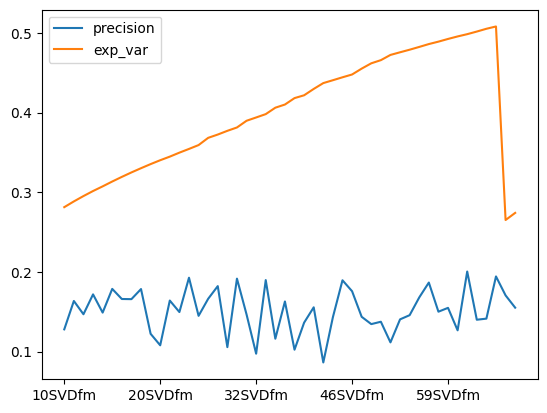

In [45]:
mean_result_df.T.plot(y=['precision', 'exp_var'])

In [3]:
with open('./total_result_3.pickle', mode='rb') as f:
    tot_results = pickle.load(f)

In [11]:
pd.DataFrame(tot_results)

,16SVDfm,63SVDfm,19SVDfm,46SVDfm,43SVDfm,40SVDfm
precision,"[0.056422018348623856, 0.04036697247706422, 0....","[0.04770642201834863, 0.05504587155963303, 0.0...","[0.09908256880733946, 0.0720183486238532, 0.09...","[0.033486238532110094, 0.03944954128440368, 0....","[0.08623853211009175, 0.04541284403669725, 0.0...","[0.07201834862385322, 0.10688073394495413, 0.0..."
recall,"[0.005365014136143964, 0.003931215573967718, 0...","[0.004038397889431294, 0.00627177872852422, 0....","[0.007811161781451276, 0.008499545085749405, 0...","[0.002551856156282426, 0.007467869604562883, 0...","[0.009833162238648458, 0.005317209517273654, 0...","[0.008557627921117009, 0.014215653826318774, 0..."
hit_rate,"[0.21330275229357798, 0.15137614678899083, 0.2...","[0.1834862385321101, 0.23623853211009174, 0.17...","[0.27293577981651373, 0.28440366972477066, 0.3...","[0.13302752293577982, 0.15825688073394495, 0.2...","[0.3165137614678899, 0.18807339449541285, 0.11...","[0.26376146788990823, 0.3646788990825688, 0.26..."
reciprocal_rank,"[0.11383792048929665, 0.05963302752293578, 0.1...","[0.12484709480122323, 0.06234709480122324, 0.1...","[0.17339449541284402, 0.1760703363914373, 0.19...","[0.061697247706422015, 0.0933103975535168, 0.1...","[0.18574159021406728, 0.0706039755351682, 0.08...","[0.15191131498470944, 0.22289755351681959, 0.1..."
dcg,"[0.16994775454517355, 0.10313327734784887, 0.2...","[0.16667710303905015, 0.11991493373824014, 0.1...","[0.30726326082619854, 0.2336825876795263, 0.29...","[0.09608573929704672, 0.12759239368924913, 0.1...","[0.27341970045222175, 0.11609928600805668, 0.1...","[0.22635227651061895, 0.3402705194589487, 0.19..."
exp_var,"[0.31925835150916987, 0.31925835150916987, 0.3...","[0.5052073715936617, 0.5052073715936617, 0.505...","[0.3352981735367574, 0.3352981735367574, 0.335...","[0.44781470204644697, 0.44781470204644697, 0.4...","[0.4370167838687877, 0.4370167838687877, 0.437...","[0.4255519409592231, 0.4255519409592231, 0.425..."
const_err,"[6.433065941228768, 6.433065941228768, 6.43306...","[5.484517826960937, 5.484517826960937, 5.48451...","[6.356825328683547, 6.356825328683547, 6.35682...","[5.793876873744349, 5.793876873744349, 5.79387...","[5.850251894776252, 5.850251894776252, 5.85025...","[5.909520251419777, 5.909520251419777, 5.90952..."


In [41]:
for i in range(5):
    print(pd.DataFrame(tot_results['16SVDfm']).iloc[[0+i, 5+i, 10+i, 15+i, 20+i], :])

    precision    recall  hit_rate  reciprocal_rank       dcg   exp_var  \
0    0.056422  0.005365  0.213303         0.113838  0.169948  0.319258   
5    0.056422  0.005365  0.213303         0.113838  0.169948  0.319258   
10   0.056422  0.005365  0.213303         0.113838  0.169948  0.319258   
15   0.056422  0.005365  0.213303         0.113838  0.169948  0.319258   
20   0.056422  0.005365  0.213303         0.113838  0.169948  0.319258   

    const_err  
0    6.433066  
5    6.433066  
10   6.433066  
15   6.433066  
20   6.433066  
    precision    recall  hit_rate  reciprocal_rank       dcg   exp_var  \
1    0.040367  0.003931  0.151376         0.059633  0.103133  0.319258   
6    0.040367  0.003931  0.151376         0.059633  0.103133  0.319258   
11   0.040367  0.003931  0.151376         0.059633  0.103133  0.319258   
16   0.040367  0.003931  0.151376         0.059633  0.103133  0.319258   
21   0.040367  0.003931  0.151376         0.059633  0.103133  0.319258   

    const_err 

In [40]:
print(pd.DataFrame(tot_results['16SVDfm']).iloc[[1, 6, 11, 16, 21], :])

    precision    recall  hit_rate  reciprocal_rank       dcg   exp_var  \
1    0.040367  0.003931  0.151376         0.059633  0.103133  0.319258   
6    0.040367  0.003931  0.151376         0.059633  0.103133  0.319258   
11   0.040367  0.003931  0.151376         0.059633  0.103133  0.319258   
16   0.040367  0.003931  0.151376         0.059633  0.103133  0.319258   
21   0.040367  0.003931  0.151376         0.059633  0.103133  0.319258   

    const_err  
1    6.433066  
6    6.433066  
11   6.433066  
16   6.433066  
21   6.433066  
